In [ ]:
from google.colab import files
uploaded = files.upload()


Saving datasets_8494_11879_test_BdBKkAj.csv to datasets_8494_11879_test_BdBKkAj.csv


In [ ]:
import pandas as pd
df=pd.read_csv('datasets_8494_11879_test_BdBKkAj.csv',encoding='utf-8')

In [ ]:
df.head()

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041


In [ ]:
df.describe()

,Junction,ID
count,11808.000000,1.180800e+04
mean,2.500000,2.017087e+10
std,1.118081,1.124665e+05
min,1.000000,2.017070e+10
25%,1.750000,2.017073e+10
50%,2.500000,2.017083e+10
75%,3.250000,2.017100e+10
max,4.000000,2.017103e+10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  11808 non-null  object
 1   Junction  11808 non-null  int64 
 2   ID        11808 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 276.9+ KB


In [ ]:
print(df.isnull().sum())

DateTime    0
Junction    0
ID          0
dtype: int64


In [ ]:
df['Date']=df['DateTime'].str.split(' ').str[0]
df['Time']=df['DateTime'].str.split(' ').str[1]

In [ ]:
df.head()

,DateTime,Junction,ID,Date,Time
0,2017-07-01 00:00:00,1,20170701001,2017-07-01,00:00:00
1,2017-07-01 01:00:00,1,20170701011,2017-07-01,01:00:00
2,2017-07-01 02:00:00,1,20170701021,2017-07-01,02:00:00
3,2017-07-01 03:00:00,1,20170701031,2017-07-01,03:00:00
4,2017-07-01 04:00:00,1,20170701041,2017-07-01,04:00:00


In [ ]:
df.drop(['DateTime'],axis=1,inplace=True)

In [ ]:
df

,Junction,ID,Date,Time
0,1,20170701001,2017-07-01,00:00:00
1,1,20170701011,2017-07-01,01:00:00
2,1,20170701021,2017-07-01,02:00:00
3,1,20170701031,2017-07-01,03:00:00
4,1,20170701041,2017-07-01,04:00:00
...,...,...,...,...
11803,4,20171031194,2017-10-31,19:00:00
11804,4,20171031204,2017-10-31,20:00:00
11805,4,20171031214,2017-10-31,21:00:00
11806,4,20171031224,2017-10-31,22:00:00


In [ ]:
df['Junction'].value_counts()

,count
Junction,
1,2952
2,2952
3,2952
4,2952


# **EDA**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

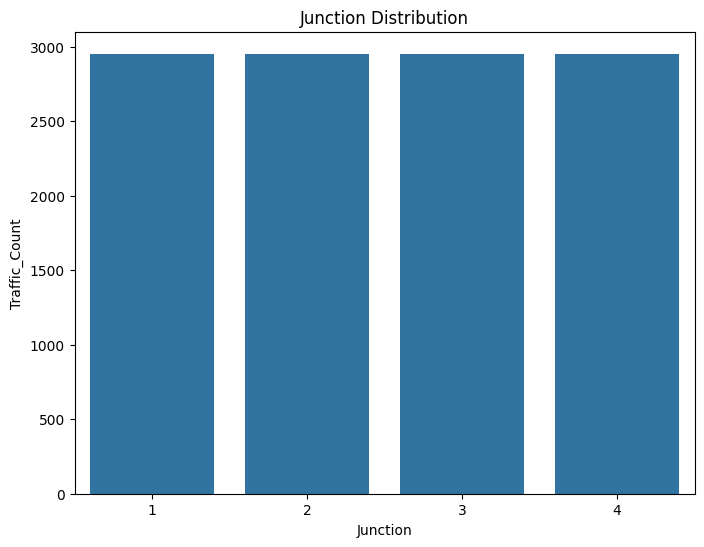

In [ ]:

junction_counts=df['Junction'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=junction_counts.index,y=junction_counts.values)
plt.xlabel('Junction')
plt.ylabel('Traffic_Count')
plt.title('Junction Distribution')
plt.show()


In [ ]:
# Unifrom Traffic Distribution

#Good
#1 Balance traffic flow
#2 Reduce the complexity of giving prority to any junction

# Bad
#1 anything change in any individual junction (infrastructure change or peak loads) still it providing the uniform traffic distribution

<ipython-input-24-7eea0247a27d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.groupby(pd.to_datetime(df['Time']).dt.hour)['Junction'].count().plot(kind='line')


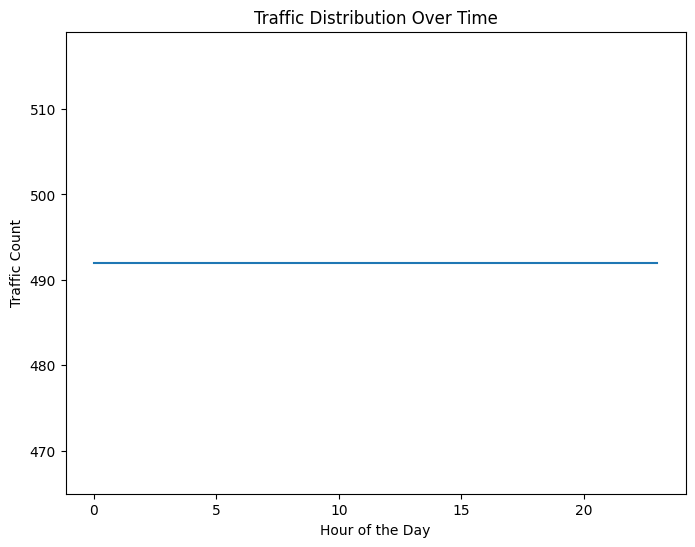

In [ ]:
plt.figure(figsize=(8,6))
df.groupby(pd.to_datetime(df['Time']).dt.hour)['Junction'].count().plot(kind='line')
plt.title('Traffic Distribution Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Count')
plt.show()

In [ ]:
# tRAFFIC remain constant whole the day in each hour atleast 492 vehicles comes

# good NO peak hours
# consistent Demand (constant traffic volume)


#Bad
# if certain things happen(accident), if may increase traffic constantly

#A horizontal line graph indicating constant traffic counts across all hours of the day means that traffic flow is even and does not fluctuate based on the time of day. This uniform distribution can simplify traffic management

<ipython-input-31-e2d4fbc70a5f>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weekday_traffic = df[df['Day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])].groupby(pd.to_datetime(df['Time']).dt.hour)['Junction'].count()
<ipython-input-31-e2d4fbc70a5f>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weekend_traffic = df[df['Day'].isin(['Saturday', 'Sunday'])].groupby(pd.to_datetime(df['Time']).dt.hour)['Junction'].count()


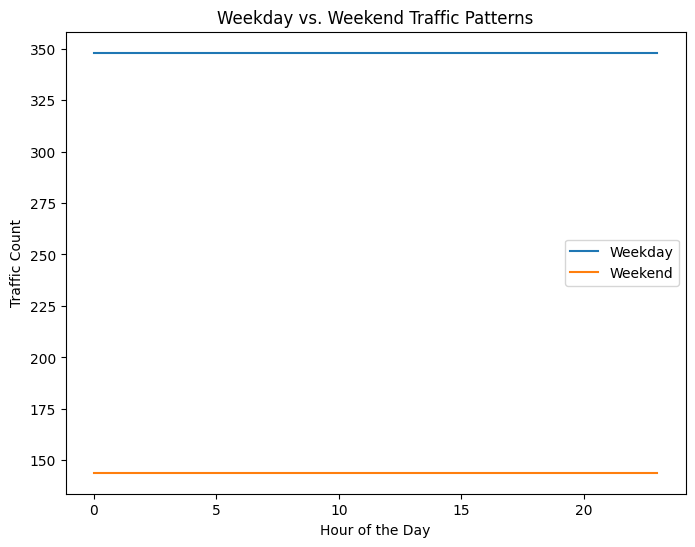

In [ ]:
# 3. Investigate the differences between weekdays and weekends
df['Day'] = pd.to_datetime(df['Date']).dt.day_name()
weekday_traffic = df[df['Day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])].groupby(pd.to_datetime(df['Time']).dt.hour)['Junction'].count()
weekend_traffic = df[df['Day'].isin(['Saturday', 'Sunday'])].groupby(pd.to_datetime(df['Time']).dt.hour)['Junction'].count()

plt.figure(figsize=(8, 6))
weekday_traffic.plot(label='Weekday')
weekend_traffic.plot(label='Weekend')
plt.title('Weekday vs. Weekend Traffic Patterns')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Count')
plt.legend()
plt.show()

In [ ]:
# significan difference between weekdays and weekend
# weekdays volume is very high
# weekends volume is very low

# this indicate it is industrial or coroperte sector region

<ipython-input-30-9da3050ab929>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pivot_table = df.pivot_table(index='Day', columns=pd.to_datetime(df['Time']).dt.hour, values='Junction', aggfunc='count')


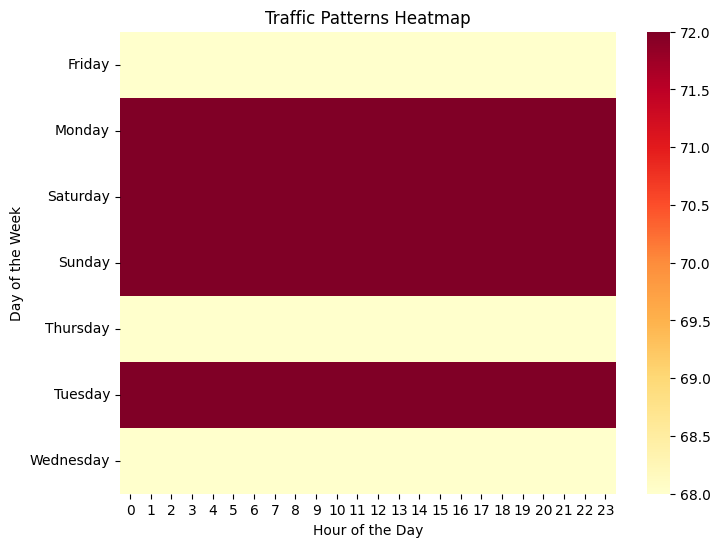

In [ ]:
# 4. Create a heatmap to visualize the traffic patterns
pivot_table = df.pivot_table(index='Day', columns=pd.to_datetime(df['Time']).dt.hour, values='Junction', aggfunc='count')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, cmap='YlOrRd')
plt.title('Traffic Patterns Heatmap')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()